In [21]:
import tensorflow.compat.v1 as tf
tf.logging.set_verbosity(tf.logging.ERROR)

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
import random


In [7]:
#import 6000 images from mnist data set
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [9]:

#look for the condition throw error otherwise
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal .."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal .."
assert(X_train.shape[1:] == (28, 28)), "The dimension of the images are not 28x28"
assert(X_test.shape[1:] == (28, 28)), "The dimension of the images are not 28x28"

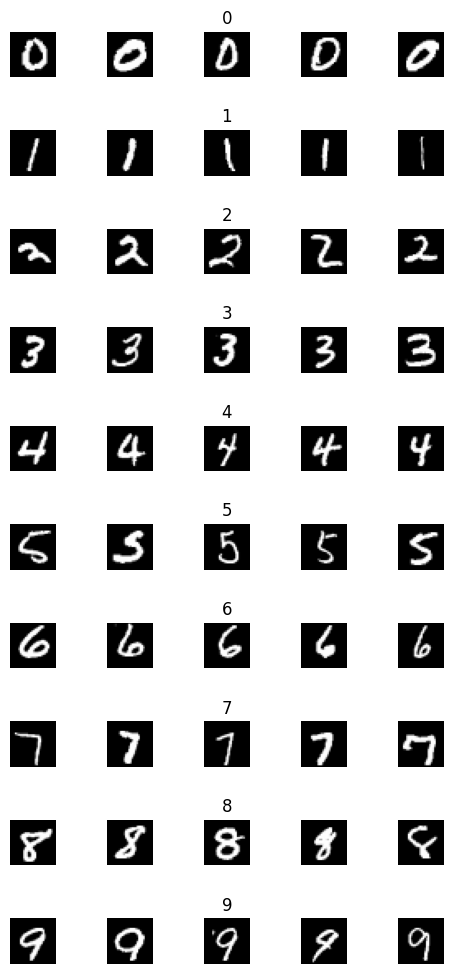

In [10]:
num_of_samples = []

cols = 5
num_of_classes = 10

fig, axs = plt.subplots(nrows=num_of_classes, ncols=cols,
                       figsize=(5, 10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_of_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected -1)),
                                :, :],
                    cmap=plt.get_cmap('gray'))
    axs[j][i].axis("off")
    if i==2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

In [15]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10) 

In [16]:

#Each image has Intensity from 0 to 255
X_train = X_train/255 
X_test = X_test/255

In [17]:
#we must change the shape of the images to 1d array(28*28)
#for multipication 1*784
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0],
                         num_pixels)
X_test = X_test.reshape(X_test.shape[0],
                         num_pixels)
print(X_train.shape)

(60000, 784)


In [18]:
def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim = num_pixels,
                  activation = 'relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(num_of_classes, activation='softmax'))
  model.compile(Adam(lr=0.01),
                loss='categorical_crossentropy',
               metrics=['accuracy'])
  return model  

In [22]:
model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
 dense_5 (Dense)             (None, 30)                330       
                                                                 
 dense_6 (Dense)             (None, 10)                310       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
Total params: 8600 (33.59 KB)
Trainable params: 8600 (33.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [27]:
history = model.fit(X_train, y_train, validation_split=0.1,
         epochs=10, batch_size=200, verbose=1, shuffle=1)

Epoch 1/10
270/270 [==============================] - 2s 7ms/step - loss: 0.1480 - accuracy: 0.9573 - val_loss: 0.1582 - val_accuracy: 0.9547
Epoch 2/10
270/270 [==============================] - 2s 7ms/step - loss: 0.1460 - accuracy: 0.9573 - val_loss: 0.1638 - val_accuracy: 0.9540
Epoch 3/10
270/270 [==============================] - 2s 6ms/step - loss: 0.1449 - accuracy: 0.9578 - val_loss: 0.1609 - val_accuracy: 0.9540
Epoch 4/10
270/270 [==============================] - 2s 7ms/step - loss: 0.1442 - accuracy: 0.9576 - val_loss: 0.1639 - val_accuracy: 0.9520
Epoch 5/10
270/270 [==============================] - 2s 6ms/step - loss: 0.1428 - accuracy: 0.9576 - val_loss: 0.1629 - val_accuracy: 0.9543
Epoch 6/10
270/270 [==============================] - 2s 6ms/step - loss: 0.1419 - accuracy: 0.9583 - val_loss: 0.1614 - val_accuracy: 0.9533
Epoch 7/10
270/270 [==============================] - 2s 7ms/step - loss: 0.1405 - accuracy: 0.9585 - val_loss: 0.1611 - val_accuracy: 0.9560
Epoch 

In [28]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

<class 'list'>
Test Score: 0.1990566849708557
Test Accuracy: 0.946399986743927
